# Testing code during development 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading data

In [2]:
from demand_fc.read_data import read_data

# reading voiholm rode data 
rides_raw_df = read_data('../input/voiholm.csv')

# reading weather data
weather_raw_df = read_data('../input/weather_data.csv')

INFO:root:Read dataframe from file path ../input/voiholm.csv
INFO:root:Read dataframe from file path ../input/weather_data.csv


In [3]:
from verify_data import verify_ride_df, verify_weather_df

# verifying the dataframes 
rides_df = verify_ride_df(rides_raw_df)
weather_df = verify_weather_df(weather_raw_df)

INFO:root:Validated Voiholm ride dataframe
INFO:root:Validated weather dataframe


### Preprocessing data

In [94]:
rides_df['start_date'] =  pd.to_datetime(rides_df.start_time.dt.date)
rides_df['start_weekday'] =  rides_df.start_time.dt.day_name()

In [98]:
# # #  Creating a dataframe with all possible combinations of days and h3index small area  # # #

# Extracting all unique h3index small
unique_h3index_df = rides_df.groupby('h3index_small').count().reset_index()[['h3index_small']]
unique_h3index_df['key'] = 1

# Extracting all uqniue dates in the dataset
unique_dates_df = rides_df.groupby('start_date').count().reset_index()[['start_date']]
unique_dates_df['key'] = 1

# Creating a dataframe which combinees all possible combinations of days and h3index small areas
all_combination_df = pd.merge(unique_h3index_df, unique_dates_df, on='key').drop('key', axis=1)
all_combination_df

,h3index_small,start_date
0,891f2506107ffff,2020-08-01
1,891f2506107ffff,2020-08-02
2,891f2506107ffff,2020-08-03
3,891f2506107ffff,2020-08-04
4,891f2506107ffff,2020-08-05
...,...,...
9775,891f25a9ecbffff,2020-08-26
9776,891f25a9ecbffff,2020-08-27
9777,891f25a9ecbffff,2020-08-28
9778,891f25a9ecbffff,2020-08-29


In [99]:
# Aggregating number of rides per h3index_small area and per day 

rides_per_h3_and_day_df =  rides_df.groupby(['h3index_small', 'start_date']).agg({'ride_id':'nunique'}).reset_index()
rides_per_h3_and_day_df.rename(columns={'ride_id':'num_of_rides'}, inplace=True)
rides_per_h3_and_day_df

# merging on the dataframe with all potential combinations 
rides_per_h3_and_day_final_df = pd.merge(rides_per_h3_and_day_df, all_combination_df, on=['h3index_small', 'start_date'], how='outer')
rides_per_h3_and_day_final_df.num_of_rides.fillna(0, inplace=True)
rides_per_h3_and_day_final_df.sort_values(by=['h3index_small', 'start_date']).reset_index().drop(columns='index')

rides_per_h3_and_day_final_df

,h3index_small,start_date,num_of_rides
0,891f2506107ffff,2020-08-03,1.0
1,891f2506107ffff,2020-08-04,2.0
2,891f2506107ffff,2020-08-05,2.0
3,891f2506107ffff,2020-08-07,2.0
4,891f2506107ffff,2020-08-08,2.0
...,...,...,...
9775,891f25a9ecbffff,2020-08-25,0.0
9776,891f25a9ecbffff,2020-08-26,0.0
9777,891f25a9ecbffff,2020-08-27,0.0
9778,891f25a9ecbffff,2020-08-28,0.0


In [5]:
from preprocess_data import processing

df = processing(rides_df=rides_df, weather_df=weather_df)
df

,ride_id,city_name,start_time,start_lon,start_lat,h3index_big,h3index_small,start_date,start_weekday,date,temperature,max_temperature,min_temperature,precipitation
0,97341db7-f89f-45db-9dd1-bcc2620fc1db,voiholm,2020-08-05 04:27:40.425797,11.908587,57.687122,881f250613fffff,891f250612bffff,2020-08-05,Wednesday,2020-08-05,21.5,26.5,17.0,0.50
1,646c160f-bbb7-4c78-b2ca-bdd8644a8400,voiholm,2020-08-05 07:47:29.060615,11.908669,57.687050,881f250613fffff,891f250612bffff,2020-08-05,Wednesday,2020-08-05,21.5,26.5,17.0,0.50
2,6082a591-03ca-4a6d-a7f4-af9ea5a30366,voiholm,2020-08-05 07:42:37.610980,11.908693,57.687042,881f250613fffff,891f250612bffff,2020-08-05,Wednesday,2020-08-05,21.5,26.5,17.0,0.50
3,eea5165f-c8e5-4e61-b604-c219226dbc1e,voiholm,2020-08-05 13:38:59.425146,11.912271,57.689289,881f250613fffff,891f2506123ffff,2020-08-05,Wednesday,2020-08-05,21.5,26.5,17.0,0.50
4,ef26200a-6d0f-40cf-b1fb-91b2a5b6270c,voiholm,2020-08-05 03:29:27.859222,11.913318,57.690361,881f250613fffff,891f2506123ffff,2020-08-05,Wednesday,2020-08-05,21.5,26.5,17.0,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164361,818eb4eb-03b1-4836-80dd-eedf24245e8f,voiholm,2020-08-21 13:59:31.111663,12.000498,57.717979,881f25a9ebfffff,891f25a9ebbffff,2020-08-21,Friday,2020-08-21,20.4,23.0,18.1,3.61
164362,e3c47612-6c61-4acc-a456-cb4292fa96f4,voiholm,2020-08-21 08:18:33.740151,12.000905,57.714794,881f25a9ebfffff,891f25a9eabffff,2020-08-21,Friday,2020-08-21,20.4,23.0,18.1,3.61
164363,cc117fa0-458b-409a-a847-6b2675bbef0b,voiholm,2020-08-21 06:57:10.500826,12.005732,57.721436,881f25a9ebfffff,891f25a9eb7ffff,2020-08-21,Friday,2020-08-21,20.4,23.0,18.1,3.61
164364,fc79fa02-c231-48d2-9caf-81e8ece06cdc,voiholm,2020-08-21 10:29:34.908873,12.005229,57.720001,881f25a9ebfffff,891f25a9eb7ffff,2020-08-21,Friday,2020-08-21,20.4,23.0,18.1,3.61


### Visulazing data

In [29]:
# Aggregating number of rides per day 
rides_per_day_df = df.groupby(['start_date',
                                'start_weekday',
                                'temperature',
                                'precipitation']).agg({'ride_id':'nunique'}).reset_index()

rides_per_day_df.rename(columns={'ride_id':'num_of_rides'}, inplace=True)
rides_per_day_df.head(5)

,start_date,start_weekday,temperature,precipitation,num_of_rides
0,2020-08-01,Saturday,17.6,0.69,8689
1,2020-08-02,Sunday,16.7,0.00,3574
2,2020-08-03,Monday,16.8,0.00,4169
3,2020-08-04,Tuesday,15.0,11.44,4912
4,2020-08-05,Wednesday,21.5,0.50,2668


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


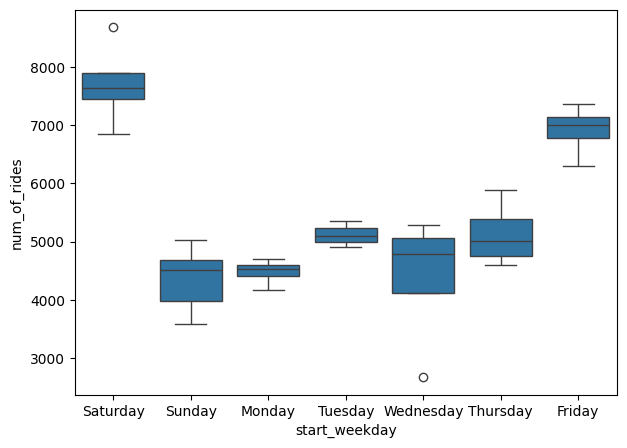

In [30]:
# Plotting boxplot for number of rides per weekday
plt.figure(figsize=[7,5])
sns.boxplot(x='start_weekday', y='num_of_rides', data=rides_per_day_df)
plt.show()

In [31]:
rides_per_day_df[['precipitation', 'temperature', 'num_of_rides']].corr()

,precipitation,temperature,num_of_rides
precipitation,1.000000,-0.260865,-0.081143
temperature,-0.260865,1.000000,0.016990
num_of_rides,-0.081143,0.016990,1.000000


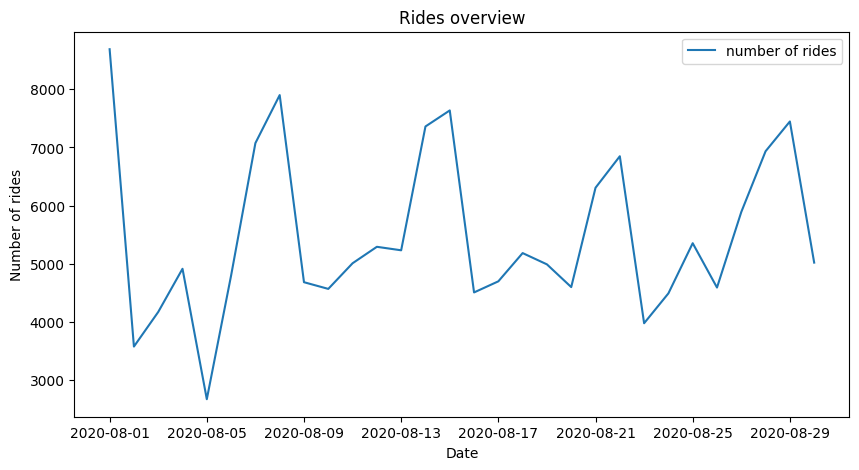

In [39]:
# Plotting rides 
plt.figure(figsize=(10,5))
plt.plot(rides_per_day_df.start_date, rides_per_day_df.num_of_rides, label='number of rides')

plt.title("Rides overview")
plt.xlabel("Date")
plt.ylabel("Number of rides")
plt.legend()
plt.show()

In [76]:
all_combination_df[all_combination_df.h3index_small == '891f2506107ffff']

,h3index_small,start_date
0,891f2506107ffff,2020-08-01
1,891f2506107ffff,2020-08-02
2,891f2506107ffff,2020-08-03
3,891f2506107ffff,2020-08-04
4,891f2506107ffff,2020-08-05
5,891f2506107ffff,2020-08-06
6,891f2506107ffff,2020-08-07
7,891f2506107ffff,2020-08-08
8,891f2506107ffff,2020-08-09
9,891f2506107ffff,2020-08-10


In [85]:
rides_per_h3_and_day_df =  df.groupby(['h3index_small', 'start_date']).agg({'ride_id':'nunique'}).reset_index()
rides_per_h3_and_day_df.rename(columns={'ride_id':'num_of_rides'}, inplace=True)
rides_per_h3_and_day_df

hej = pd.merge(rides_per_h3_and_day_df, all_combination_df, on=['h3index_small', 'start_date'], how='outer')

hej.num_of_rides.fillna(0, inplace=True)
hej

hej.sort_values(by=['h3index_small', 'start_date']).reset_index().drop(columns='index')

,h3index_small,start_date,num_of_rides
0,891f2506107ffff,2020-08-03,1
1,891f2506107ffff,2020-08-04,2
2,891f2506107ffff,2020-08-05,2
3,891f2506107ffff,2020-08-07,2
4,891f2506107ffff,2020-08-08,2
...,...,...,...
8139,891f25a9ebbffff,2020-08-30,6
8140,891f25a9ecbffff,2020-08-17,1
8141,891f25a9ecbffff,2020-08-21,1
8142,891f25a9ecbffff,2020-08-23,1


In [88]:
hej = pd.merge(rides_per_h3_and_day_df, all_combination_df, on=['h3index_small', 'start_date'], how='outer')

hej.num_of_rides.fillna(0, inplace=True)
hej

,h3index_small,start_date,num_of_rides
0,891f2506107ffff,2020-08-03,1.0
1,891f2506107ffff,2020-08-04,2.0
2,891f2506107ffff,2020-08-05,2.0
3,891f2506107ffff,2020-08-07,2.0
4,891f2506107ffff,2020-08-08,2.0
...,...,...,...
9775,891f25a9ecbffff,2020-08-25,0.0
9776,891f25a9ecbffff,2020-08-26,0.0
9777,891f25a9ecbffff,2020-08-27,0.0
9778,891f25a9ecbffff,2020-08-28,0.0


In [91]:
hej.sort_values(by=['h3index_small', 'start_date']).reset_index().drop(columns='index')

,h3index_small,start_date,num_of_rides
0,891f2506107ffff,2020-08-01,0.0
1,891f2506107ffff,2020-08-02,0.0
2,891f2506107ffff,2020-08-03,1.0
3,891f2506107ffff,2020-08-04,2.0
4,891f2506107ffff,2020-08-05,2.0
...,...,...,...
9775,891f25a9ecbffff,2020-08-26,0.0
9776,891f25a9ecbffff,2020-08-27,0.0
9777,891f25a9ecbffff,2020-08-28,0.0
9778,891f25a9ecbffff,2020-08-29,1.0
